In [1]:
%run "Common setup.ipynb"

In [2]:
from SALib.analyze.sobol import analyze

In [3]:
# Results produced with:
# python launch.py --specific_inputs saltelli_5_samples.csv --num_cores 46

In [4]:
def incremental_saltelli_analysis(lower, upper, step=1):
    res, idx = [], []
    for reps in range(lower, upper, step):
        results = analyze(CIM_SPEC, np_res[:reps], seed=101, calc_second_order=False)
        total, first = results.to_df()

        res.append(first.loc[tgt_param, 'S1'])
        idx.append(int(reps/step))
    # End for
    
    return res, idx
# End incremental_saltelli_analysis()


def incremental_saltelli_analysis_2nd_order(lower, upper, step=1):
    res, idx = [], []
    for reps in range(lower, upper, step):
        results = analyze(CIM_SPEC, np_res[:reps], seed=101, calc_second_order=True)
        total, first, second = results.to_df()

        res.append(first.loc[tgt_param, 'S1'])
        idx.append(int(reps/step))
    # End for
    
    return res, idx
# End incremental_saltelli_analysis()

In [5]:
### With more samples...

numeric_samples = pd.read_csv(f'{DATA_DIR}saltelli_5_numeric_samples.csv', index_col=0)
numeric_samples = numeric_samples[perturbed_cols]
numeric_vals = numeric_samples.values

In [6]:
# Coupling disabled
saltelli_no_irrigation_results = pd.read_csv(f'{DATA_DIR}saltelli_no_irrigation_5_results.csv', index_col=0)
saltelli_no_irrigation_results['Avg. $/ML'].fillna(saltelli_no_irrigation_results["Avg. Annual Profit ($M)"], inplace=True)

target_result_idx = saltelli_no_irrigation_results.columns.tolist().index(tgt_metric)
np_res = saltelli_no_irrigation_results.values[:, 0]

runs = np_res.shape[0]
res, idx = incremental_saltelli_analysis(55, runs+1, 55)

disabled = pd.DataFrame({"S1": res}, index=idx)

# ax = pd.DataFrame({"ST": res}, index=idx).plot(kind='bar', rot=45)
# ax.set_title("Saltelli (Sobol') Analysis\n(Deactivated Parameter)")
# ax.set_xlabel("n")
# plt.savefig(f'{FIG_DIR}saltelli_deactivated_results.png', dpi=300, bbox_inches='tight')

In [7]:
# Coupling enabled

saltelli_with_irrigation_results = pd.read_csv(f'{DATA_DIR}saltelli_with_irrigation_5_results.csv', index_col=0)
saltelli_with_irrigation_results['Avg. $/ML'].fillna(saltelli_with_irrigation_results["Avg. Annual Profit ($M)"], inplace=True)

target_result_idx = saltelli_with_irrigation_results.columns.tolist().index(tgt_metric)

np_res = saltelli_with_irrigation_results.values[:, target_result_idx]

runs = np_res.shape[0]
res, idx = incremental_saltelli_analysis(55, runs+1, 55)

enabled = pd.DataFrame({"S1": res}, index=idx)

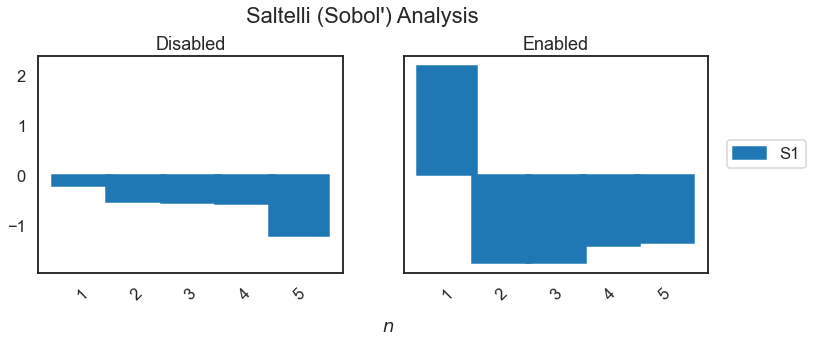

In [8]:
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True, sharex=True)

labels = [str(i) if i % 1 == 0 else '' for i in idx]
disabled.loc[:, 'S1'].plot(kind='bar', 
                           legend=None,
                           title='Disabled',
                           ax=axes[0],
                           use_index=False,
                           rot=45,
                           width=1.1,
                           edgecolor='C0')

enabled.loc[:, 'S1'].plot(kind='bar', 
                          legend=None,
                          title='Enabled',
                          ax=axes[1],
                          use_index=False,
                          rot=45,
                          width=1.1,
                          edgecolor='C0').legend(
                             bbox_to_anchor=(1.35, 0.65)
                          )
fig.suptitle("Saltelli (Sobol') Analysis", x=0.5, y=1.05, fontsize=22)
# fig.tight_layout()
plt.xlabel("$n$", x=-0.05, labelpad=15);

axes[0].set_xticklabels(labels)
axes[1].set_xticklabels(labels);

In [9]:
fig.savefig(FIG_DIR+'saltelli_larger_sample.png', dpi=300, bbox_inches='tight')

---

Using full result set

In [10]:
target_result_idx = all_outputs.columns.tolist().index("SW Allocation Index")

numeric_samples = to_numeric_samples(all_inputs)
numeric_vals = numeric_samples.values
np_res = all_outputs.iloc[:, target_result_idx].values

<AxesSubplot:>

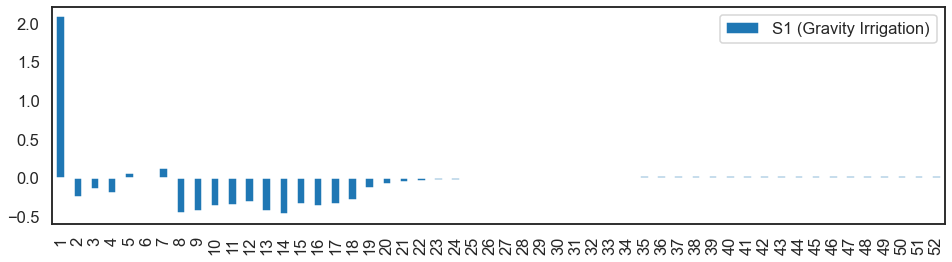

In [11]:
res, idx = incremental_saltelli_analysis_2nd_order(108, 5625, 108)
pd.DataFrame({'S1 (Gravity Irrigation)': res}, index=idx).plot(kind='bar', figsize=(16,4))